# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

### Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import stats

## Reading the Data into a DataFrame

In [2]:
abtest = pd.read_csv('C:/Users/mctal/Documents/DSBA materials/Business Statistics/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

#### Viewing the first few rows of the dataset

In [3]:
abtest.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


- Dataset was loaded properly

#### Viewing the last few rows of the dataset

In [4]:
abtest.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


- The data loaded properly

#### Checking the shape of the dataset

In [5]:
abtest.shape

(100, 6)

- There are 100 rows and 6 columns

#### Checking the statistical summary of the Dataset

In [6]:
abtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


- There are 2 numerical data and 4 Objects
- User id and time spent on the page are numerical data while group, landing page, converted and language preferred are objects

In [7]:
abtest.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


- The average time spent on the page is 5.38 minutes
- The mean and median are close, means it is a normal distribution
- The minimum time spent is 0.19 minutes and the maximum time spent is 10.71 minutes

In [8]:
abtest.describe(include= 'all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


- For the categorical data, from the unqiue, frequency and top statistics;
    - There are two groups - control and treatment
    - There are 2 landing pages, old and new
    - There are 54 users that converted to be a subsriber
    - There are 3 preferred laguages with Spanish been most preferred with 34 users

#### Checking missing values

In [9]:
abtest.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

- There are no missing values in the dataset

#### Checking for duplicates

In [10]:
abtest.duplicated().sum()

0

- There are no duplicates in the dataset

### Univariate Analysis

#### User ID

In [11]:
abtest['user_id'].nunique()

100

- There are 100 unqiue user IDs

#### Group

In [12]:
abtest['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

- There are 50 control and treatment groups respectively

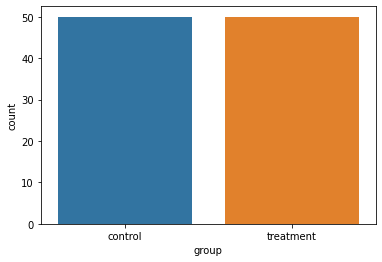

In [13]:
sns.countplot(data=abtest, x= 'group');

- There are 50 equal numbers of control and treatment groups

#### Landing Page

In [14]:
abtest['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

- There are 50 users each that accessed the old and new page

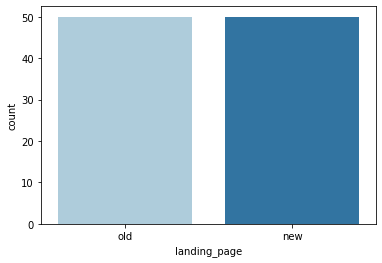

In [15]:
sns.countplot(data=abtest, x= 'landing_page', palette = 'Paired');

- There are 50 equal numbers of users that viewed the old and new page

#### Time spent on the page

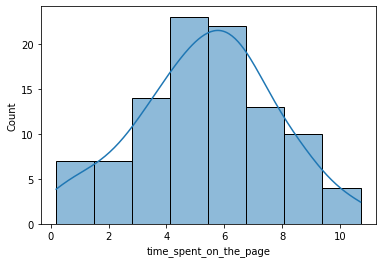

In [16]:
sns.histplot(data=abtest,x='time_spent_on_the_page', kde= True);

- The graph follows a normal distribution
- Most users spent more time on page between 4-7 minutes
- The least time spent on a page is less than a minute
- The highest time spent on a page is more than 10 minutes

#### Converted

In [17]:
abtest['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

- The number of users converted to subscribers is 54 while the number of users not converted is 46

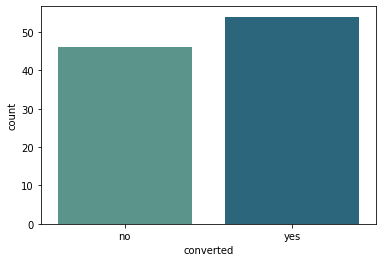

In [18]:
sns.countplot(data=abtest, x= 'converted', palette = 'crest');

- There are more users who opted to be subsribers

#### Language Preferred

In [19]:
abtest['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

- There are 34 users each that used Spanish or French as their preferred language
- English language was the lest preferred language

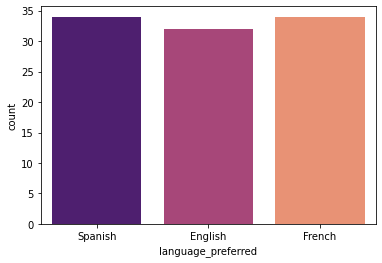

In [20]:
sns.countplot(data=abtest, x= 'language_preferred', palette = 'magma');

- More users used Spanish or French as their preferred language

### Bivariate Analysis

#### Group vs Converted

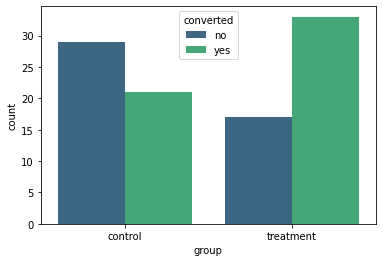

In [21]:
sns.countplot(data=abtest, x='group' , hue='converted', palette = 'viridis');

- More users in the treatment group were converted to subscribers than in the old group
- More users were not converted to subsribers in the control group than in the treatment group

#### Group vs Time Spent

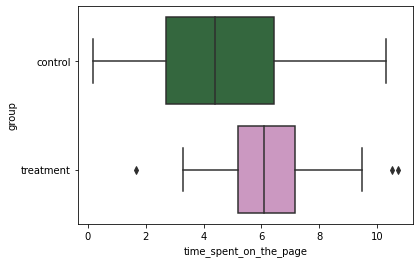

In [22]:
sns.boxplot(data=abtest,y='group',x='time_spent_on_the_page', palette = 'cubehelix');

- The distribution in the control and treatment groups are normal
- There are some outliers in the treatment group

#### Converted vs Time Spent

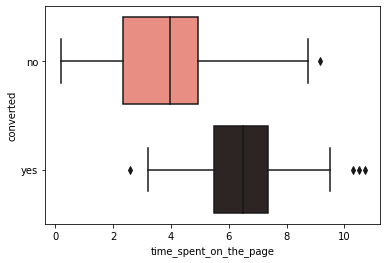

In [23]:
sns.boxplot(data=abtest,y='converted',x='time_spent_on_the_page', palette = 'dark:salmon_r');

- The users not converted plot is left skewed
- There are outliers in both users converted or not
- The users not converted spent the lest time on the page than those converted

#### Language preferred vs Time spent

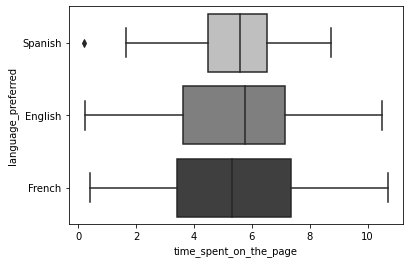

In [24]:
sns.boxplot(data=abtest,y='language_preferred',x='time_spent_on_the_page', palette = 'gist_yarg');

- There is an outlier in Spanish language
- English language plot is left skewed
- French language plot is a normal distribution
- French users spent the most time than other language users

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

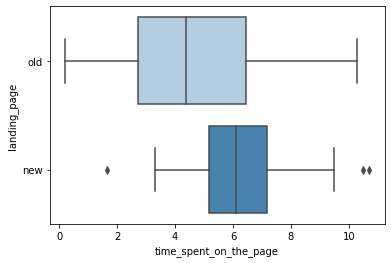

In [25]:
sns.boxplot(data=abtest,y='landing_page',x='time_spent_on_the_page',palette = 'Blues');

- From the plot more users spend time on the new landing page than the old one
- There are some outliers in the new landing page
- The old plot is right skewed

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the mean time spent for the new and old landing page respectively.

$H_0$: $\mu_1 <= \mu_2$

$H_a$: $\mu_1 > \mu_2$

### Step 2: Select Appropriate test

This is a two independent proportion test with unknown standard deviations. Therefore it is a one tailed **2 sample independent t-test**

### Step 3: Decide the significance level

$\alpha = 0.05$

### Step 4: Collect and prepare data

In [26]:
#Subset for users in the new landing page
new_group = abtest[abtest['landing_page'] == 'new']['time_spent_on_the_page']

#Subset for users in old landing page
old_group = abtest[abtest['landing_page'] == 'old']['time_spent_on_the_page']

#Comparing std of the groups
print('The standard deviation of the time spent on the new page is:', round(new_group.std(),2))
print('The standard deviation of the time spent on the old page is:', round(old_group.std(),2))

The standard deviation of the time spent on the new page is: 1.82
The standard deviation of the time spent on the old page is: 2.58


- The sample standard deviations are unequal

### Step 5: Calculate the p-value

In [27]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(new_group, old_group, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [28]:
# conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value (0.00014) is less than the significance level, we reject the null hypothesis, therefore we have enough statistical information to prove that users in the new page spend more time in the old page

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

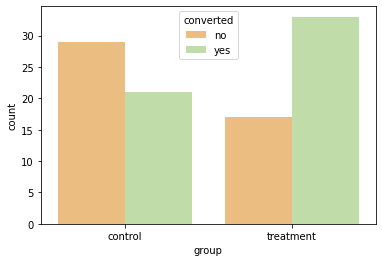

In [29]:
sns.countplot(data=abtest, x='group' , hue='converted', palette ='Spectral');

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the conversion rate of users for the new and old landing page respectively.

$H_0$: $\mu_1 <= \mu_2$

$H_a$: $\mu_1 > \mu_2$

### Step 2: Select Appropriate test

We are comparing the proportions from 2 populations. Therefore we use one-tailed **2 sample proportion z-test**

### Step 3: Decide the significance level

$\alpha = 0.05$

### Step 4: Collect and prepare data

In [30]:
#number of converted users in treatment group
treat_conv = abtest[abtest['group'] == 'treatment']['converted'].value_counts()['yes']
#number of converted users in control group
cont_conv = abtest[abtest['group'] == 'control']['converted'].value_counts()['yes']

#total number of users in treatment group
t_treat = abtest.group.value_counts()['treatment']
#total number of users in control group
t_cont = abtest.group.value_counts()['control']

### Step 5: Calculate the p-value

In [31]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest([treat_conv, cont_conv ] , [t_treat, t_cont], alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [32]:
# conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value (0.008) is less than the significance level, we reject the null hypothesis, there for we have enough statistical information to prove that users in the new landing page gets converted to subscribers than the old page

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

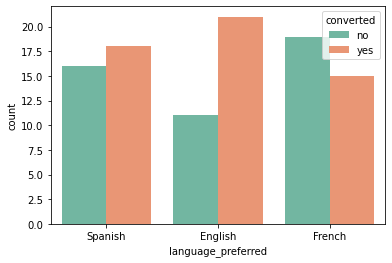

In [33]:
sns.countplot(data=abtest, x='language_preferred' , hue='converted', palette= 'Set2');

### Step 1: Define the null and alternate hypotheses

$H_0$: Conversion and preferred languare are independent

$H_a$: Conversion and preferred language are related

### Step 2: Select Appropriate test

Checking whether the categorical variables from a population are independent or not. we use **Chi Square test for independence**

### Step 3: Decide the significance level

$\alpha = 0.05$

### Step 4: Collect and prepare data

In [34]:
#creating contigency table
conti_table = pd.crosstab(abtest['converted'], abtest['language_preferred'])
conti_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [35]:
#import the required function
from scipy.stats import chi2_contingency

# calculating the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(conti_table)

print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [36]:
# conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

- The p-value been greater than the significance value, the conversion and preferred language are independent. These categorigies do not influence the outcome of the other

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

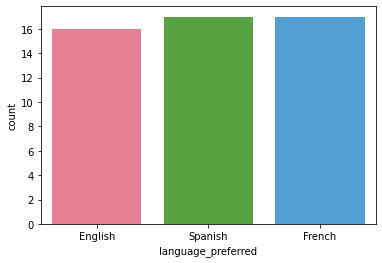

In [37]:
#creating a new dataframe for users in new page only
abtest_newpg = abtest[abtest['landing_page'] == 'new']

sns.countplot(data=abtest_newpg, x='language_preferred', palette = 'husl');

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the mean time spent on new page for of English, French and Spanish respectively.

$H_0$: $\mu_1 = \mu_2 = \mu_3$

$H_a$: $\mu_1 \neq \mu_2 \neq \mu_3$

### Step 2: Select Appropriate test

This deals with 3 different proportions, **we use ANOVA test**

### Step 3: Decide the significance level

$\alpha = 0.05$

### Step 4: Collect and prepare data

In [38]:
# the mean time spent on the new page for different language users
abtest_newpg.groupby(['language_preferred'])['time_spent_on_the_page'].mean()


language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

In [39]:
# creating a subset data for each language users 
english_time = abtest_newpg[abtest_newpg['language_preferred']=='English']['time_spent_on_the_page']
french_time = abtest_newpg[abtest_newpg['language_preferred']== 'French']['time_spent_on_the_page'] 
spanish_time = abtest_newpg[abtest_newpg['language_preferred']== 'Spanish']['time_spent_on_the_page']  

### Step 5: Calculate the p-value

In [40]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway (english_time, french_time, spanish_time)

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [41]:
# conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

The p-value been greater than the significance level, we fail to reject the null hypothesis. Therefore the time spent on the new page accross different languages is the same

## Conclusion and Business Recommendations

From the various statistical analysis, we can conclude the following;
- The new landing page has an impact on the users that visit the website
- There is a high possiblity to get more subscribers to the service using the new landing page
- The website languages have little to no impact to the user's choice of preferrence

**My Recommendations are as following;**
- The new landing page should be taken up as the defacto page for the e-news, as users spend more time on the new page than the old
- Having other languages added to the existing 3 will bring in more subscribers to the page

___